In [1]:
from osrs_GE import *
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt

C:\Users\Cody\Documents\Python Scripts\osrs_GE.py:220: SyntaxWarning: invalid escape sequence '\W'
  id,interval = re.split("\W+|_",f)[-3:-1]


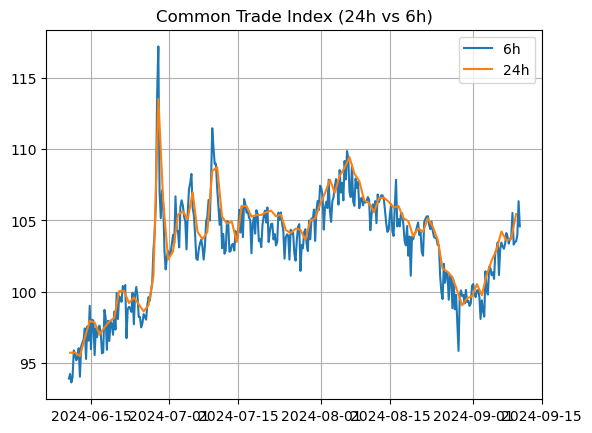

In [59]:
temp1 = compute_CTI(interval='6h')
temp2 = compute_CTI(interval='24h')
temp2.index = temp2.index + pd.Timedelta(18,'h')

plt.plot(temp1,label='6h')
plt.plot(temp2[temp2.index.isin(temp1.index)],label='24h')
plt.title("Common Trade Index (24h vs 6h)")
plt.grid()
plt.legend()
plt.show()

In [22]:
df_index_px = pd.read_excel('index_start_px.xlsx',index_col='id',names = ['name','id','start_px'])

df_index_px.head(10)

,name,start_px
id,,
453,Coal,470
2353,Steel bar,155
444,Gold ore,207
561,Nature rune,215
560,Death rune,199
7936,Pure essence,2
1515,Yew logs,279
1513,Magic logs,1093
1739,Cowhide,156


In [80]:
df_index_px['weight'] = 1/df_index_px['start_px']
INDEX_MULT = 100.0/df_index_px.shape[0]

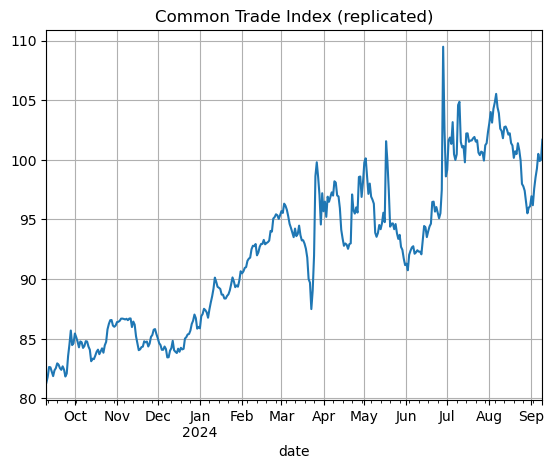

In [92]:
df_CTI = read_CTI_master_file('24h')
df_CTI = compute_VWAP(df_CTI)
df_CTI = df_CTI.filter(['VWAP'])

earliest = df_CTI.groupby(by='id').apply(lambda x:x.index.get_level_values(1).min()).max()

# start from the latest start date for each of the items in CTI
df_CTI = df_CTI.loc[df_CTI.index.get_level_values(1)>=earliest]

df_CTI = pd.merge(df_CTI,df_index_px,how='left',left_on='id',right_index=True)

df_CTI['index_ctrb'] = df_CTI['weight'] * df_CTI['VWAP']
CTI_px = df_CTI.groupby('date')['index_ctrb'].sum()*INDEX_MULT

CTI_px.plot()
plt.title("Common Trade Index (replicated)")
plt.grid()
plt.show()

In [ ]:
def 